<a href="https://colab.research.google.com/github/bs3537/airbnb/blob/master/AirBNB_ExtraTreeregressor_100trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/bs3537/airbnb/master/listings.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [0]:
#Drop unecessary columns
cleaned_df = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'calculated_host_listings_count', 'last_review', 'availability_365', 'minimum_nights', 'reviews_per_month'])

In [5]:
cleaned_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,118
1,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,6
2,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,143
3,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,25
4,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,197


In [6]:
cleaned_df.shape

(22552, 7)

In [7]:
cleaned_df.isnull().sum()

neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
number_of_reviews      0
dtype: int64

In [8]:
cleaned_df.dtypes

neighbourhood_group     object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                    int64
number_of_reviews        int64
dtype: object

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

In [10]:
train, val = train, val = train_test_split(cleaned_df, train_size=0.70, test_size=0.30, 
                              random_state=42)
train.shape, val.shape

((15786, 7), (6766, 7))

In [11]:
#Baseline for the train dataset
train['price']. describe()

count    15786.000000
mean        68.514950
std        237.658333
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [12]:
guess = train['price'].mean()
print('At the baseline, the mean listing price is=', guess)

At the baseline, the mean listing price is= 68.51494995565692


In [0]:
#If we had just guessed the listing price, we would be off by how much?

In [13]:
from sklearn.metrics import mean_absolute_error

# Arrange y target vectors
target = 'price'
y_train = train[target]
y_val = val[target]

# Get mean baseline
print('Mean Baseline (using 0 features)')
guess = y_train.mean()

# Train Error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train mean absolute error: {mae:.2f} ')

# Test Error
y_pred = [guess] * len(y_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation mean absolute error: {mae:.2f} ')

Mean Baseline (using 0 features)
Train mean absolute error: 43.25 
Validation mean absolute error: 38.87 


In [0]:
#Fitting the ML model

In [0]:
# The status_group column is the target
target = 'price'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 200
categorical_features = cardinality[cardinality <= 200].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [16]:
pip install category_encoders

     |████████████████████████████████| 102kB 3.7MB/s 


In [0]:
from sklearn.pipeline import Pipeline, make_pipeline
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import model_selection, preprocessing

In [0]:
encoder = OrdinalEncoder()

In [0]:
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.fit_transform(X_val)

In [0]:
model = ExtraTreesRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_features='auto', criterion='mae', max_depth=4)  
#features from TPOT regressor best fitted pipeline

In [60]:
#fit on X_train, y_train
model.fit(X_train_encoded, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=4, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [0]:
#predict on X_val
y_pred = model.predict(X_val_encoded)

In [62]:
# Get Validation MAE
mae = mean_absolute_error(y_val, y_pred)
print('Val. Mean Absolute Error', mae)

Val. Mean Absolute Error 27.959558823529413


In [0]:
#Better result using same parameters as TPOT regessor. Increasing max_deth worsened result.
#RandomsearchCV did not work with this model, will try GridSearchCV but MAE in same range as RFregressor using parameters from Gridsearch CV run earlier (using just 2 features). 

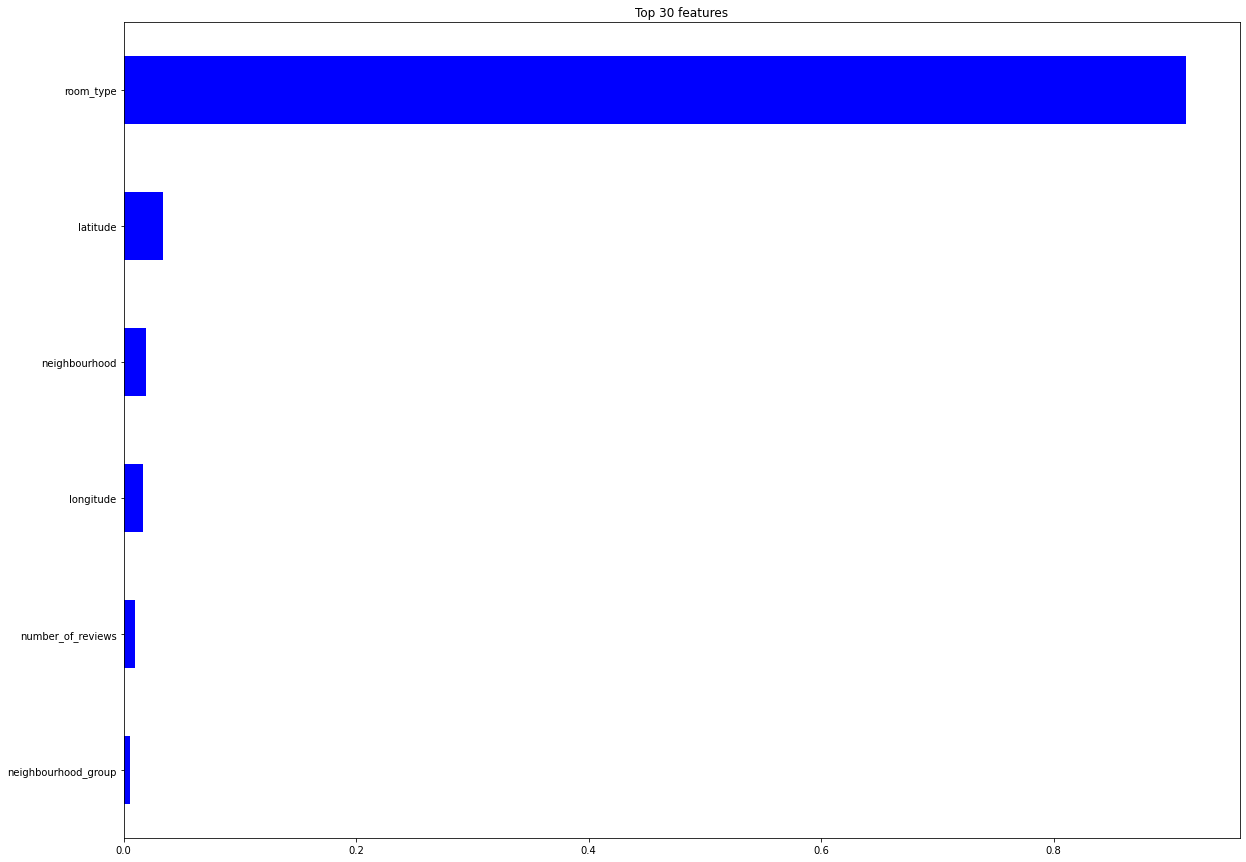

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
importances = pd.Series(model.feature_importances_, X_val.columns)

# Plot feature importances
n = 30
plt.figure(figsize=(20, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');